In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

In [2]:
DATADIR = "Datasets/PetImages"
CATEGORIES = ["Dog", "Cat"]

Pictures: 12501


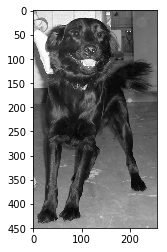

In [3]:
for categories in CATEGORIES:
    path = os.path.join(DATADIR, categories)
    for img in os.listdir(path):
        print("Pictures: {}".format(len(os.listdir(path))))
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap="gray")
        plt.show()
        break
    break

In [4]:
img_array.shape

(450, 256)

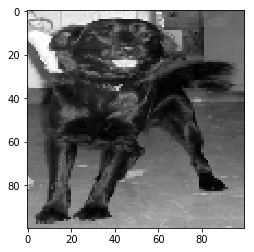

In [5]:
# different shaped photos pose a problem
IMG_SIZE = 100

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap="gray")
plt.show()

In [6]:
training_data = []

IMG_SIZE = 50

# 0 is dog, 1 is cat
def create_training_data():
    for categories in CATEGORIES:
        path = os.path.join(DATADIR, categories)
        class_num = CATEGORIES.index(categories)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass

create_training_data()

In [7]:
len(training_data)

24946

In [8]:
import random

random.shuffle(training_data)

In [9]:
# check to see if shuffled than ordered
for sample in training_data[:11]:
    print(sample[1]) # print the labels

1
1
0
1
1
0
0
1
1
0
0


In [10]:
X = []
y = []

In [11]:
for features, label in training_data:
    X.append(features)
    y.append(label)

In [12]:
X[0]

array([[ 51,  54,  53, ...,  54,  55,  54],
       [ 69,  55,  57, ...,  60,  53,  59],
       [ 50,  48,  49, ...,  58,  56,  57],
       ...,
       [193, 194, 199, ..., 217, 201, 204],
       [200, 203, 209, ..., 208, 211, 210],
       [203, 201, 211, ..., 219, 219, 221]], dtype=uint8)

In [13]:
np.array(X[0]).reshape(-1, IMG_SIZE, IMG_SIZE, 1).shape

(1, 50, 50, 1)

In [14]:
# X has to be an array, need to reshape
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [15]:
X.shape

(24946, 50, 50, 1)

In [16]:
#saving training data
import pickle

pickle_out = open("X.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle", "wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [17]:
# to read it back

pickle_in = open("X.pickle", "rb")
test = pickle.load(pickle_in)
test[0]

array([[[ 51],
        [ 54],
        [ 53],
        ...,
        [ 54],
        [ 55],
        [ 54]],

       [[ 69],
        [ 55],
        [ 57],
        ...,
        [ 60],
        [ 53],
        [ 59]],

       [[ 50],
        [ 48],
        [ 49],
        ...,
        [ 58],
        [ 56],
        [ 57]],

       ...,

       [[193],
        [194],
        [199],
        ...,
        [217],
        [201],
        [204]],

       [[200],
        [203],
        [209],
        ...,
        [208],
        [211],
        [210]],

       [[203],
        [201],
        [211],
        ...,
        [219],
        [219],
        [221]]], dtype=uint8)

In [18]:
X[0]

array([[[ 51],
        [ 54],
        [ 53],
        ...,
        [ 54],
        [ 55],
        [ 54]],

       [[ 69],
        [ 55],
        [ 57],
        ...,
        [ 60],
        [ 53],
        [ 59]],

       [[ 50],
        [ 48],
        [ 49],
        ...,
        [ 58],
        [ 56],
        [ 57]],

       ...,

       [[193],
        [194],
        [199],
        ...,
        [217],
        [201],
        [204]],

       [[200],
        [203],
        [209],
        ...,
        [208],
        [211],
        [210]],

       [[203],
        [201],
        [211],
        ...,
        [219],
        [219],
        [221]]], dtype=uint8)